In [1]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ
from sklearn.model_selection import learning_curve, GridSearchCV

In [2]:
#emotion_labelデータの読みこみ

data1_d_label_50 = pd.read_csv('emotion_label/session1/D/emotion_D_20201111_1_50.csv')
data1_d_label_60 = pd.read_csv('emotion_label/session1/D/emotion_D_20201111_1_60.csv')
data1_d_label_70 = pd.read_csv('emotion_label/session1/D/emotion_D_20201111_1_70.csv')
data1_d_label_80 = pd.read_csv('emotion_label/session1/D/emotion_D_20201111_1_80.csv')

# data2_a_label_50 = pd.read_csv('emotion_label/D/emotion_D_20201111_2_50.csv')
# data2_a_label_60 = pd.read_csv('emotion_label/D/emotion_D_20201111_2_60.csv')
# data2_a_label_70 = pd.read_csv('emotion_label/D/emotion_D_20201111_2_70.csv')
# data2_a_label_80 = pd.read_csv('emotion_label/D/emotion_D_20201111_2_80.csv')

#feature_data(特徴量データーセット)の読みこみ
data1_d_record_all_feature_50 = pd.read_csv('feature/D/data1_d_50_record_all_feature.csv')
data1_d_record_all_feature_60 = pd.read_csv('feature/D/data1_d_60_record_all_feature.csv')
data1_d_record_all_feature_70 = pd.read_csv('feature/D/data1_d_70_record_all_feature.csv')
data1_d_record_all_feature_80 = pd.read_csv('feature/D/data1_d_80_record_all_feature.csv')

# data2_a_record_all_feature_50 = pd.read_csv('feature/D/data2_a_50_record_all_feature.csv')
# data2_a_record_all_feature_60 = pd.read_csv('feature/D/data2_a_60_record_all_feature.csv')
# data2_a_record_all_feature_70 = pd.read_csv('feature/D/data2_a_70_record_all_feature.csv')
# data2_a_record_all_feature_80 = pd.read_csv('feature/D/data2_a_80_record_all_feature.csv')

# feature_emg = pd.read_csv("feature_emg.csv")

#確認
display(data1_d_record_all_feature_50)
display(data1_d_label_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
0,2020-11-11 12:41:20,2020-11-11 12:41:24,7619.611,-517.010,-5825.177,-76.281,158.667,-2.846,153495.523679,29852.451900,...,6477,-1048,-7002,-1323,-2121,-587,9.001957,112.833439,0.391389,364.980613
1,2020-11-11 12:41:21,2020-11-11 12:41:25,7713.400,-488.355,-5723.911,-73.285,161.165,-4.408,115533.616000,24922.774975,...,6477,-1014,-7002,-969,-2121,-678,14.481409,83.856668,0.782779,186.583991
2,2020-11-11 12:41:22,2020-11-11 12:41:26,7760.317,-459.719,-5664.404,-73.081,129.147,-2.594,145601.768511,21691.352039,...,6477,-951,-7002,-969,-2121,-678,5.479452,116.057375,0.391389,289.367042
3,2020-11-11 12:41:23,2020-11-11 12:41:27,7829.777,-443.414,-5577.741,-68.132,200.965,4.568,176957.941271,23935.976604,...,6477,-951,-7002,-1030,-2121,-678,5.479452,117.897418,0.782779,283.254023
4,2020-11-11 12:41:24,2020-11-11 12:41:28,7938.081,-434.823,-5447.728,-60.532,147.794,3.960,160270.170439,25472.423671,...,6477,-951,-7002,-1030,-2121,-678,5.870841,108.852958,0.782779,361.540628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2020-11-11 12:53:49,2020-11-11 12:53:53,7110.880,503.203,-6337.904,-19.086,-82.279,43.748,264588.499600,64247.957791,...,6220,-212,-8044,-1573,-8255,-812,9.784736,66.338997,0.391389,673.082865
637,2020-11-11 12:53:50,2020-11-11 12:53:54,6913.177,406.586,-6552.461,-75.792,-87.928,31.505,127530.217671,26641.624604,...,6220,-212,-8044,-1573,-8255,-843,6.262231,64.863680,0.391389,733.107554
638,2020-11-11 12:53:51,2020-11-11 12:53:55,6815.271,434.962,-6653.038,-46.912,109.182,2.632,44140.087559,13068.274556,...,6230,-14,-7898,-1573,-8255,-843,3.913894,108.320582,0.391389,1044.320488
639,2020-11-11 12:53:52,2020-11-11 12:53:56,6823.858,417.047,-6648.090,-39.289,84.448,-4.885,40135.655836,8796.316791,...,6230,-14,-7898,-1573,-8255,-843,3.913894,118.849182,0.782779,1083.530339


,start_time,finish_time,emotion_level,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,6:50,6:54,4,NaN,NaN,NaN
1,6:51,6:55,4,NaN,NaN,NaN
2,6:52,6:56,4,NaN,NaN,NaN
3,6:53,6:57,4,NaN,NaN,NaN
4,6:54,6:58,4,NaN,NaN,NaN
...,...,...,...,...,...,...
636,19:19,19:23,-2,NaN,NaN,NaN
637,19:20,19:24,-2,NaN,NaN,NaN
638,19:21,19:25,-2,NaN,NaN,NaN
639,19:22,19:26,-2,NaN,NaN,NaN


In [3]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=1)
    return a

data1_d_label_50 = dropna(data1_d_label_50)
data1_d_label_60 = dropna(data1_d_label_60)
data1_d_label_70 = dropna(data1_d_label_70)
data1_d_label_80 = dropna(data1_d_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [4]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=0)
    return a

data1_d_label_50 = dropna(data1_d_label_50)
data1_d_label_60 = dropna(data1_d_label_60)
data1_d_label_70 = dropna(data1_d_label_70)
data1_d_label_80 = dropna(data1_d_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [5]:
#emotion_labelデータからtimeHMSとsubject列を消去

data1_d_label_50 = data1_d_label_50.drop(["start_time", "finish_time"], axis=1)
data1_d_label_60 = data1_d_label_60.drop(["start_time", "finish_time"], axis=1)
data1_d_label_70 = data1_d_label_70.drop(["start_time", "finish_time"], axis=1)
data1_d_label_80 = data1_d_label_80.drop(["start_time", "finish_time"], axis=1)

# data2_a_label_50 = data2_a_label_50.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_60 = data2_a_label_60.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_70 = data2_a_label_70.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_80 = data2_a_label_80.drop(["start_time", "finish_time"], axis=1)

#確認
data1_d_label_50

,emotion_level
0,4
1,4
2,4
3,4
4,4
...,...
636,-2
637,-2
638,-2
639,-2


In [6]:
#feature_dataとemotion_labelデータを連結
data1_d_record_all_feature_50 = pd.concat([data1_d_record_all_feature_50, data1_d_label_50], axis=1, ignore_index=False)
data1_d_record_all_feature_60 = pd.concat([data1_d_record_all_feature_60, data1_d_label_60], axis=1, ignore_index=False)
data1_d_record_all_feature_70 = pd.concat([data1_d_record_all_feature_70, data1_d_label_70], axis=1, ignore_index=False)
data1_d_record_all_feature_80 = pd.concat([data1_d_record_all_feature_80, data1_d_label_80], axis=1, ignore_index=False)

# data2_a_record_all_feature_50 = pd.concat([data2_a_record_all_feature_50, data2_a_label_50], axis=1, ignore_index=False)
# data2_a_record_all_feature_60 = pd.concat([data2_a_record_all_feature_60, data2_a_label_60], axis=1, ignore_index=False)
# data2_a_record_all_feature_70 = pd.concat([data2_a_record_all_feature_70, data2_a_label_70], axis=1, ignore_index=False)
# data2_a_record_all_feature_80 = pd.concat([data2_a_record_all_feature_80, data2_a_label_80], axis=1, ignore_index=False)

#データの確認(確認のためセッション1のDさんのデータを表示している)
display(data1_d_record_all_feature_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 12:41:20,2020-11-11 12:41:24,7619.611,-517.010,-5825.177,-76.281,158.667,-2.846,153495.523679,29852.451900,...,-1048,-7002,-1323,-2121,-587,9.001957,112.833439,0.391389,364.980613,4
1,2020-11-11 12:41:21,2020-11-11 12:41:25,7713.400,-488.355,-5723.911,-73.285,161.165,-4.408,115533.616000,24922.774975,...,-1014,-7002,-969,-2121,-678,14.481409,83.856668,0.782779,186.583991,4
2,2020-11-11 12:41:22,2020-11-11 12:41:26,7760.317,-459.719,-5664.404,-73.081,129.147,-2.594,145601.768511,21691.352039,...,-951,-7002,-969,-2121,-678,5.479452,116.057375,0.391389,289.367042,4
3,2020-11-11 12:41:23,2020-11-11 12:41:27,7829.777,-443.414,-5577.741,-68.132,200.965,4.568,176957.941271,23935.976604,...,-951,-7002,-1030,-2121,-678,5.479452,117.897418,0.782779,283.254023,4
4,2020-11-11 12:41:24,2020-11-11 12:41:28,7938.081,-434.823,-5447.728,-60.532,147.794,3.960,160270.170439,25472.423671,...,-951,-7002,-1030,-2121,-678,5.870841,108.852958,0.782779,361.540628,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2020-11-11 12:53:49,2020-11-11 12:53:53,7110.880,503.203,-6337.904,-19.086,-82.279,43.748,264588.499600,64247.957791,...,-212,-8044,-1573,-8255,-812,9.784736,66.338997,0.391389,673.082865,-2
637,2020-11-11 12:53:50,2020-11-11 12:53:54,6913.177,406.586,-6552.461,-75.792,-87.928,31.505,127530.217671,26641.624604,...,-212,-8044,-1573,-8255,-843,6.262231,64.863680,0.391389,733.107554,-2
638,2020-11-11 12:53:51,2020-11-11 12:53:55,6815.271,434.962,-6653.038,-46.912,109.182,2.632,44140.087559,13068.274556,...,-14,-7898,-1573,-8255,-843,3.913894,108.320582,0.391389,1044.320488,-2
639,2020-11-11 12:53:52,2020-11-11 12:53:56,6823.858,417.047,-6648.090,-39.289,84.448,-4.885,40135.655836,8796.316791,...,-14,-7898,-1573,-8255,-843,3.913894,118.849182,0.782779,1083.530339,-2


In [7]:
data1_d_record_all_feature_60

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 12:41:21,2020-11-11 12:41:25,7713.400,-488.355,-5723.911,-73.285,161.165,-4.408,115533.616000,24922.774975,...,-1014,-7002,-969,-2121,-678,14.481409,83.856668,0.782779,186.583991,4
1,2020-11-11 12:41:22,2020-11-11 12:41:26,7760.317,-459.719,-5664.404,-73.081,129.147,-2.594,145601.768511,21691.352039,...,-951,-7002,-969,-2121,-678,5.479452,116.057375,0.391389,289.367042,4
2,2020-11-11 12:41:23,2020-11-11 12:41:27,7829.777,-443.414,-5577.741,-68.132,200.965,4.568,176957.941271,23935.976604,...,-951,-7002,-1030,-2121,-678,5.479452,117.897418,0.782779,283.254023,4
3,2020-11-11 12:41:24,2020-11-11 12:41:28,7938.081,-434.823,-5447.728,-60.532,147.794,3.960,160270.170439,25472.423671,...,-951,-7002,-1030,-2121,-678,5.870841,108.852958,0.782779,361.540628,4
4,2020-11-11 12:41:25,2020-11-11 12:41:29,8040.117,-420.990,-5326.090,-61.167,246.664,0.620,75312.227311,19692.293900,...,-853,-6523,-1030,-1707,-678,7.436399,79.466715,0.391389,329.961274,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,2020-11-11 12:53:49,2020-11-11 12:53:53,7110.880,503.203,-6337.904,-19.086,-82.279,43.748,264588.499600,64247.957791,...,-212,-8044,-1573,-8255,-812,9.784736,66.338997,0.391389,673.082865,-2
625,2020-11-11 12:53:50,2020-11-11 12:53:54,6913.177,406.586,-6552.461,-75.792,-87.928,31.505,127530.217671,26641.624604,...,-212,-8044,-1573,-8255,-843,6.262231,64.863680,0.391389,733.107554,-2
626,2020-11-11 12:53:51,2020-11-11 12:53:55,6815.271,434.962,-6653.038,-46.912,109.182,2.632,44140.087559,13068.274556,...,-14,-7898,-1573,-8255,-843,3.913894,108.320582,0.391389,1044.320488,-2
627,2020-11-11 12:53:52,2020-11-11 12:53:56,6823.858,417.047,-6648.090,-39.289,84.448,-4.885,40135.655836,8796.316791,...,-14,-7898,-1573,-8255,-843,3.913894,118.849182,0.782779,1083.530339,-2


In [8]:
print(len(data1_d_record_all_feature_50))
print(len(data1_d_record_all_feature_60))
print(len(data1_d_record_all_feature_70))
print(len(data1_d_record_all_feature_80))

641
629
618
604


In [9]:
#時間でデータを切り出している
#38→上から37行目までを抜き出している
data1_d_50_record_all_feature_1 = data1_d_record_all_feature_50.iloc[0:214]
data1_d_50_record_all_feature_2 = data1_d_record_all_feature_50.iloc[214:428]
data1_d_50_record_all_feature_3 = data1_d_record_all_feature_50.iloc[428:641]

data1_d_60_record_all_feature_1 = data1_d_record_all_feature_60.iloc[0:210]
data1_d_60_record_all_feature_2 = data1_d_record_all_feature_60.iloc[210:420]
data1_d_60_record_all_feature_3 = data1_d_record_all_feature_60.iloc[420:629]

data1_d_70_record_all_feature_1 = data1_d_record_all_feature_70.iloc[0:206]
data1_d_70_record_all_feature_2 = data1_d_record_all_feature_70.iloc[206:412]
data1_d_70_record_all_feature_3 = data1_d_record_all_feature_70.iloc[412:618]

data1_d_80_record_all_feature_1 = data1_d_record_all_feature_80.iloc[0:201]
data1_d_80_record_all_feature_2 = data1_d_record_all_feature_80.iloc[201:402]
data1_d_80_record_all_feature_3 = data1_d_record_all_feature_80.iloc[402:604]


# data1_d_50_record_all_feature_1 = data1_d_record_all_feature_50.iloc[0:150]
# data1_d_50_record_all_feature_2 = data1_d_record_all_feature_50.iloc[150:300]
# data1_d_50_record_all_feature_3 = data1_d_record_all_feature_50.iloc[300:470]

# data1_d_60_record_all_feature_1 = data1_d_record_all_feature_60.iloc[0:150]
# data1_d_60_record_all_feature_2 = data1_d_record_all_feature_60.iloc[150:300]
# data1_d_60_record_all_feature_3 = data1_d_record_all_feature_60.iloc[300:470]

# data1_d_70_record_all_feature_1 = data1_d_record_all_feature_70.iloc[0:150]
# data1_d_70_record_all_feature_2 = data1_d_record_all_feature_70.iloc[150:300]
# data1_d_70_record_all_feature_3 = data1_d_record_all_feature_70.iloc[300:470]

# data1_d_80_record_all_feature_1 = data1_d_record_all_feature_80.iloc[0:150]
# data1_d_80_record_all_feature_2 = data1_d_record_all_feature_80.iloc[150:300]
# data1_d_80_record_all_feature_3 = data1_d_record_all_feature_80.iloc[300:470]

In [10]:
# data2_a_50_record_all_feature_1 = data2_a_record_all_feature_50.iloc[0:38]
# data2_a_50_record_all_feature_2 = data2_a_record_all_feature_50.iloc[38:687]
# data2_a_50_record_all_feature_3 = data2_a_record_all_feature_50.iloc[471:687]

# data2_a_60_record_all_feature_1 = data2_a_record_all_feature_60.iloc[0:38]
# data2_a_60_record_all_feature_2 = data2_a_record_all_feature_60.iloc[38:687]
# data2_a_60_record_all_feature_3 = data2_a_record_all_feature_60.iloc[471:687]

# data2_a_70_record_all_feature_1 = data2_a_record_all_feature_70.iloc[0:38]
# data2_a_70_record_all_feature_2 = data2_a_record_all_feature_70.iloc[38:687]
# data2_a_70_record_all_feature_3 = data2_a_record_all_feature_70.iloc[471:687]

# data2_a_80_record_all_feature_1 = data2_a_record_all_feature_80.iloc[0:38]
# data2_a_80_record_all_feature_2 = data2_a_record_all_feature_80.iloc[38:687]
# data2_a_80_record_all_feature_3 = data2_a_record_all_feature_80.iloc[471:687]

In [11]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が2より大きいときはpositive
# emotion_levelの列の数値が3より小さいときはother

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 2, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] <3, "label"] = "other"
    return data_record_all_feature

data1_d_50_record_all_feature_1 = emotion_level_define(data1_d_50_record_all_feature_1)
data1_d_50_record_all_feature_2 = emotion_level_define(data1_d_50_record_all_feature_2)
data1_d_50_record_all_feature_3 = emotion_level_define(data1_d_50_record_all_feature_3)

data1_d_60_record_all_feature_1 = emotion_level_define(data1_d_60_record_all_feature_1)
data1_d_60_record_all_feature_2 = emotion_level_define(data1_d_60_record_all_feature_2)
data1_d_60_record_all_feature_3 = emotion_level_define(data1_d_60_record_all_feature_3)

data1_d_70_record_all_feature_1 = emotion_level_define(data1_d_70_record_all_feature_1)
data1_d_70_record_all_feature_2 = emotion_level_define(data1_d_70_record_all_feature_2)
data1_d_70_record_all_feature_3 = emotion_level_define(data1_d_70_record_all_feature_3)

data1_d_80_record_all_feature_1 = emotion_level_define(data1_d_80_record_all_feature_1)
data1_d_80_record_all_feature_2 = emotion_level_define(data1_d_80_record_all_feature_2)
data1_d_80_record_all_feature_3 = emotion_level_define(data1_d_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_define(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_define(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_define(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_define(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_define(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_define(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_define(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_define(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_define(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_define(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_define(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_define(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature


data1_d_50_record_all_feature_1 = emotion_level_drop(data1_d_50_record_all_feature_1)
data1_d_50_record_all_feature_2 = emotion_level_drop(data1_d_50_record_all_feature_2)
data1_d_50_record_all_feature_3 = emotion_level_drop(data1_d_50_record_all_feature_3)

data1_d_60_record_all_feature_1 = emotion_level_drop(data1_d_60_record_all_feature_1)
data1_d_60_record_all_feature_2 = emotion_level_drop(data1_d_60_record_all_feature_2)
data1_d_60_record_all_feature_3 = emotion_level_drop(data1_d_60_record_all_feature_3)

data1_d_70_record_all_feature_1 = emotion_level_drop(data1_d_70_record_all_feature_1)
data1_d_70_record_all_feature_2 = emotion_level_drop(data1_d_70_record_all_feature_2)
data1_d_70_record_all_feature_3 = emotion_level_drop(data1_d_70_record_all_feature_3)

data1_d_80_record_all_feature_1 = emotion_level_drop(data1_d_80_record_all_feature_1)
data1_d_80_record_all_feature_2 = emotion_level_drop(data1_d_80_record_all_feature_2)
data1_d_80_record_all_feature_3 = emotion_level_drop(data1_d_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_drop(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_drop(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_drop(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_drop(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_drop(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_drop(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_drop(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_drop(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_drop(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_drop(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_drop(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_drop(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
data1_d_50_record_all_feature_1

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 12:41:20,2020-11-11 12:41:24,7619.611,-517.010,-5825.177,-76.281,158.667,-2.846,153495.523679,29852.451900,...,-1048,-7002,-1323,-2121,-587,9.001957,112.833439,0.391389,364.980613,positive
1,2020-11-11 12:41:21,2020-11-11 12:41:25,7713.400,-488.355,-5723.911,-73.285,161.165,-4.408,115533.616000,24922.774975,...,-1014,-7002,-969,-2121,-678,14.481409,83.856668,0.782779,186.583991,positive
2,2020-11-11 12:41:22,2020-11-11 12:41:26,7760.317,-459.719,-5664.404,-73.081,129.147,-2.594,145601.768511,21691.352039,...,-951,-7002,-969,-2121,-678,5.479452,116.057375,0.391389,289.367042,positive
3,2020-11-11 12:41:23,2020-11-11 12:41:27,7829.777,-443.414,-5577.741,-68.132,200.965,4.568,176957.941271,23935.976604,...,-951,-7002,-1030,-2121,-678,5.479452,117.897418,0.782779,283.254023,positive
4,2020-11-11 12:41:24,2020-11-11 12:41:28,7938.081,-434.823,-5447.728,-60.532,147.794,3.960,160270.170439,25472.423671,...,-951,-7002,-1030,-2121,-678,5.870841,108.852958,0.782779,361.540628,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2020-11-11 12:45:42,2020-11-11 12:45:46,7507.672,-805.982,-5910.115,-97.848,-48.446,51.813,197296.544416,108833.199676,...,-1988,-7847,-2579,-3621,-1288,12.524462,123.227887,11.741683,105.689348,positive
210,2020-11-11 12:45:43,2020-11-11 12:45:47,7428.105,-821.795,-5998.560,-7.179,86.183,-15.322,204856.483975,142721.902975,...,-1988,-7847,-2579,-3621,-1703,13.698630,84.902097,1.174168,242.857415,positive
211,2020-11-11 12:45:44,2020-11-11 12:45:48,7459.221,-844.213,-5957.474,-38.062,164.067,-29.709,233772.712159,172048.195631,...,-2127,-7847,-2579,-3621,-1703,8.610568,213.764255,0.391389,838.917173,positive
212,2020-11-11 12:45:45,2020-11-11 12:45:49,7536.455,-833.531,-5869.886,-33.464,145.246,-30.930,278276.101975,178793.031039,...,-2127,-7847,-2579,-3621,-1703,8.610568,245.488002,0.391389,492.407433,positive


In [14]:
#全データからpositiveの数を確認
data1_d_50_record_all_feature_positive_1 = data1_d_50_record_all_feature_1[data1_d_50_record_all_feature_1.label == "positive"]
data1_d_50_record_all_feature_positive_1 = data1_d_50_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_d_50_record_all_feature_positive_1))

data1_d_50_record_all_feature_positive_2 = data1_d_50_record_all_feature_2[data1_d_50_record_all_feature_2.label == "positive"]
data1_d_50_record_all_feature_positive_2 = data1_d_50_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_d_50_record_all_feature_positive_2))

data1_d_50_record_all_feature_positive_3 = data1_d_50_record_all_feature_3[data1_d_50_record_all_feature_3.label == "positive"]
data1_d_50_record_all_feature_positive_3 = data1_d_50_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_d_50_record_all_feature_positive_3))

data1_d_60_record_all_feature_positive_1 = data1_d_60_record_all_feature_1[data1_d_60_record_all_feature_1.label == "positive"]
data1_d_60_record_all_feature_positive_1 = data1_d_60_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_d_60_record_all_feature_positive_1))

data1_d_60_record_all_feature_positive_2 = data1_d_60_record_all_feature_2[data1_d_60_record_all_feature_2.label == "positive"]
data1_d_60_record_all_feature_positive_2 = data1_d_60_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_d_60_record_all_feature_positive_2))

data1_d_60_record_all_feature_positive_3 = data1_d_60_record_all_feature_3[data1_d_60_record_all_feature_3.label == "positive"]
data1_d_60_record_all_feature_positive_3 = data1_d_60_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_d_60_record_all_feature_positive_3))

data1_d_70_record_all_feature_positive_1 = data1_d_70_record_all_feature_1[data1_d_70_record_all_feature_1.label == "positive"]
data1_d_670_record_all_feature_positive_1 = data1_d_70_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_d_70_record_all_feature_positive_1))

data1_d_70_record_all_feature_positive_2 = data1_d_70_record_all_feature_2[data1_d_70_record_all_feature_2.label == "positive"]
data1_d_70_record_all_feature_positive_2 = data1_d_70_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_d_70_record_all_feature_positive_2))

data1_d_70_record_all_feature_positive_3 = data1_d_70_record_all_feature_3[data1_d_70_record_all_feature_3.label == "positive"]
data1_d_70_record_all_feature_positive_3 = data1_d_70_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_d_70_record_all_feature_positive_3))

data1_d_80_record_all_feature_positive_1 = data1_d_80_record_all_feature_1[data1_d_80_record_all_feature_1.label == "positive"]
data1_d_80_record_all_feature_positive_1 = data1_d_80_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_d_80_record_all_feature_positive_1))

data1_d_80_record_all_feature_positive_2 = data1_d_80_record_all_feature_2[data1_d_80_record_all_feature_2.label == "positive"]
data1_d_80_record_all_feature_positive_2 = data1_d_80_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_d_80_record_all_feature_positive_2))

data1_d_80_record_all_feature_positive_3 = data1_d_80_record_all_feature_3[data1_d_80_record_all_feature_3.label == "positive"]
data1_d_80_record_all_feature_positive_3 = data1_d_80_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_d_80_record_all_feature_positive_3))

54
107
198
54
105
194
53
104
191
52
101
188


In [15]:
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "positive"]
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_1))

# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "positive"]
# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_2))

# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "positive"]
# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_3))

# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "positive"]
# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_1))

# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "positive"]
# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_2))

# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "positive"]
# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_3))

# data2_a_70_record_all_feature_positive_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "positive"]
# data2_a_670_record_all_feature_positive_1 = data2_a_70_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_1))

# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "positive"]
# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_2))

# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "positive"]
# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_3))

# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_1[data2_a_80_record_all_feature_1.label == "positive"]
# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_1))

# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "positive"]
# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_2))

# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "positive"]
# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_3))

In [16]:
# #全データからotherの数を確認
data1_d_50_record_all_feature_other_1 = data1_d_50_record_all_feature_1[data1_d_50_record_all_feature_1.label == "other"]
data1_d_50_record_all_feature_other_1 = data1_d_50_record_all_feature_other_1.reset_index(drop=True)
print(len(data1_d_50_record_all_feature_other_1))

data1_d_50_record_all_feature_other_2 = data1_d_50_record_all_feature_2[data1_d_50_record_all_feature_2.label == "other"]
data1_d_50_record_all_feature_other_2 = data1_d_50_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_d_50_record_all_feature_other_2))

data1_d_50_record_all_feature_other_3 = data1_d_50_record_all_feature_3[data1_d_50_record_all_feature_3.label == "other"]
data1_d_50_record_all_feature_other_3 = data1_d_50_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_d_50_record_all_feature_other_3))

data1_d_60_record_all_feature_other_2 = data1_d_60_record_all_feature_2[data1_d_60_record_all_feature_2.label == "other"]
data1_d_60_record_all_feature_other_2 = data1_d_60_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_d_60_record_all_feature_other_2))

data1_d_60_record_all_feature_other_3 = data1_d_60_record_all_feature_3[data1_d_60_record_all_feature_3.label == "other"]
data1_d_60_record_all_feature_other_3 = data1_d_60_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_d_60_record_all_feature_other_3))

data1_d_60_record_all_feature_other_1 = data1_d_60_record_all_feature_1[data1_d_60_record_all_feature_1.label == "other"]
data1_d_60_record_all_feature_other_1 = data1_d_60_record_all_feature_other_1.reset_index(drop=True)
print(len(data1_d_60_record_all_feature_other_1))

data1_d_70_record_all_feature_other_2 = data1_d_70_record_all_feature_2[data1_d_70_record_all_feature_2.label == "other"]
data1_d_70_record_all_feature_other_2 = data1_d_70_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_d_70_record_all_feature_other_2))

data1_d_70_record_all_feature_other_3 = data1_d_70_record_all_feature_3[data1_d_70_record_all_feature_3.label == "other"]
data1_d_70_record_all_feature_other_3 = data1_d_70_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_d_70_record_all_feature_other_3))

data1_d_70_record_all_feature_other_1 = data1_d_70_record_all_feature_1[data1_d_70_record_all_feature_1.label == "other"]
data1_d_70_record_all_feature_other_1 = data1_d_70_record_all_feature_other_1.reset_index(drop=True)
print(len(data1_d_70_record_all_feature_other_1))

data1_d_80_record_all_feature_other_2 = data1_d_80_record_all_feature_2[data1_d_80_record_all_feature_2.label == "other"]
data1_d_80_record_all_feature_other_2 = data1_d_80_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_d_80_record_all_feature_other_2))

data1_d_80_record_all_feature_other_3 = data1_d_80_record_all_feature_3[data1_d_80_record_all_feature_3.label == "other"]
data1_d_80_record_all_feature_other_3 = data1_d_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_d_80_record_all_feature_other_3))

data1_d_80_record_all_feature_other_3 = data1_d_80_record_all_feature_3[data1_d_80_record_all_feature_3.label == "other"]
data1_d_80_record_all_feature_other_3 = data1_d_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_d_80_record_all_feature_other_3))

160
107
15
105
15
156
102
15
153
100
14
14


In [17]:
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "other"]
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_1))

# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "other"]
# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_2))

# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "other"]
# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "other"]
# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_2))

# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "other"]
# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "other"]
# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_1))

# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "other"]
# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_2))

# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "other"]
# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_3))

# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "other"]
# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_1))

# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "other"]
# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_2))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

In [18]:
#学習データとテストデータに分ける

train_data = pd.concat([data1_d_60_record_all_feature_1, data1_d_60_record_all_feature_2], ignore_index=True)
test_data = data1_d_60_record_all_feature_3

In [19]:
train_data

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 12:41:21,2020-11-11 12:41:25,7713.400000,-488.355000,-5723.911000,-73.285000,161.165000,-4.408000,115533.616000,24922.774975,...,-1014,-7002,-969,-2121,-678,14.481409,83.856668,0.782779,186.583991,positive
1,2020-11-11 12:41:22,2020-11-11 12:41:26,7760.317000,-459.719000,-5664.404000,-73.081000,129.147000,-2.594000,145601.768511,21691.352039,...,-951,-7002,-969,-2121,-678,5.479452,116.057375,0.391389,289.367042,positive
2,2020-11-11 12:41:23,2020-11-11 12:41:27,7829.777000,-443.414000,-5577.741000,-68.132000,200.965000,4.568000,176957.941271,23935.976604,...,-951,-7002,-1030,-2121,-678,5.479452,117.897418,0.782779,283.254023,positive
3,2020-11-11 12:41:24,2020-11-11 12:41:28,7938.081000,-434.823000,-5447.728000,-60.532000,147.794000,3.960000,160270.170439,25472.423671,...,-951,-7002,-1030,-2121,-678,5.870841,108.852958,0.782779,361.540628,positive
4,2020-11-11 12:41:25,2020-11-11 12:41:29,8040.117000,-420.990000,-5326.090000,-61.167000,246.664000,0.620000,75312.227311,19692.293900,...,-853,-6523,-1030,-1707,-678,7.436399,79.466715,0.391389,329.961274,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2020-11-11 12:49:57,2020-11-11 12:50:01,8085.101000,-484.848000,-5269.637000,-28.237000,65.490000,42.891000,46535.472799,43791.852896,...,-1444,-6060,-1494,-1987,-989,8.219178,56.644063,0.391389,587.002184,positive
416,2020-11-11 12:49:58,2020-11-11 12:50:02,7981.062374,-509.067404,-5402.727364,-81.521127,49.838028,31.574447,54066.034339,22997.813364,...,-1078,-6873,-2396,-6042,-611,8.219178,66.874727,0.782779,324.536228,positive
417,2020-11-11 12:49:59,2020-11-11 12:50:03,7987.104628,-510.995976,-5393.450704,-53.400402,141.336016,2.217304,54126.705351,23209.042237,...,-1078,-6873,-2396,-6042,-611,7.045010,47.364111,0.782779,350.568683,positive
418,2020-11-11 12:50:00,2020-11-11 12:50:04,8012.725352,-511.722334,-5362.263581,-63.467807,73.330986,12.935614,50614.430605,20420.150266,...,-1078,-6873,-2396,-6042,-611,10.176125,95.760478,0.782779,636.311392,positive


In [20]:
X_train = train_data.iloc[0:,2:30]
y_train = train_data.label

X_test = test_data.iloc[0:,2:30]
y_test = test_data.label

# X_train = train_data.iloc[0:,2:28]
# y_train = test_data.iloc[0:,2:28]

# X_test = train_data.label
# y_test = test_data.label

In [21]:
# random = RandomForestClassifier(random_state=42)
# loo=LeaveOneOut()

# score = cross_val_score(random, X, y, cv = 5)
# print(score.mean())
# print(score)

正答率0.42105263157894735
誤った個数：121
classification report
              precision    recall  f1-score   support

       other       0.08      0.67      0.14        15
    positive       0.94      0.40      0.56       194

    accuracy                           0.42       209
   macro avg       0.51      0.53      0.35       209
weighted avg       0.88      0.42      0.53       209

Confusion matrix, without normalization
[[ 10   5]
 [116  78]]


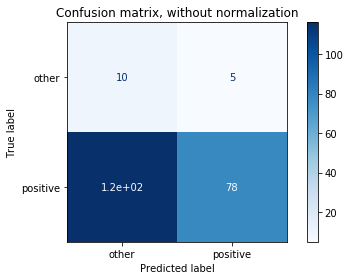

Normalized confusion matrix
[[0.66666667 0.33333333]
 [0.59793814 0.40206186]]


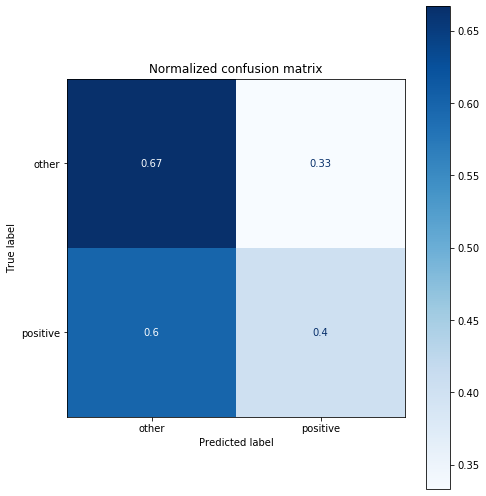

In [22]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

level_names = ["other", "positive"]

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.tight_layout()
    plt.show()

# 特徴量選択

In [23]:
other = "0"
positive = "1"

X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index(drop=True)
X_train_time = data1_d_record_all_feature_50.iloc[0:420]
X_train_time = X_train_time.iloc[0:,0:2]
X_train_time = X_train_time.reset_index(drop=True)
X_train_time = pd.concat([X_train_time, y_train], axis=1)
X_train_time.columns = ["start", "finish", "emotion_level"]
X_train_time.loc[X_train_time["emotion_level"] == "other", "label"] = 0
X_train_time.loc[X_train_time["emotion_level"] == "positive", "label"] = 1
X_train_time

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
y_test_time = data1_d_record_all_feature_50.iloc[420:629]
y_test_time = y_test_time.iloc[0:,0:2]
y_test_time = y_test_time.reset_index(drop=True)
y_test_time = pd.concat([y_test_time, y_test], axis=1)
y_test_time.columns = ["start", "finish", "emotion_level"]
y_test_time.loc[y_test_time["emotion_level"] == "other", "label"] = 0
y_test_time.loc[y_test_time["emotion_level"] == "positive", "label"] = 1
y_test_time

predicted = pd.DataFrame(predicted)
predict_time = data1_d_record_all_feature_50.iloc[420:629]
predict_time = predict_time.iloc[0:,0:2]
predict_time = predict_time.reset_index(drop=True)
predict_time = pd.concat([predict_time, predicted], axis=1)
predict_time.columns = ["start", "finish", "emotion_level"]
predict_time.loc[predict_time["emotion_level"] == "other", "label"] = 0
predict_time.loc[predict_time["emotion_level"] == "positive", "label"] = 1
predict_time

,start,finish,emotion_level,label
0,2020-11-11 12:49:51,2020-11-11 12:49:55,positive,1.0
1,2020-11-11 12:49:52,2020-11-11 12:49:56,other,0.0
2,2020-11-11 12:49:53,2020-11-11 12:49:57,other,0.0
3,2020-11-11 12:49:54,2020-11-11 12:49:58,other,0.0
4,2020-11-11 12:49:55,2020-11-11 12:49:59,other,0.0
...,...,...,...,...
204,2020-11-11 12:53:30,2020-11-11 12:53:34,positive,1.0
205,2020-11-11 12:53:31,2020-11-11 12:53:35,positive,1.0
206,2020-11-11 12:53:39,2020-11-11 12:53:43,other,0.0
207,2020-11-11 12:53:40,2020-11-11 12:53:44,other,0.0


In [24]:
y_test_time

,start,finish,emotion_level,label
0,2020-11-11 12:49:51,2020-11-11 12:49:55,positive,1.0
1,2020-11-11 12:49:52,2020-11-11 12:49:56,positive,1.0
2,2020-11-11 12:49:53,2020-11-11 12:49:57,positive,1.0
3,2020-11-11 12:49:54,2020-11-11 12:49:58,positive,1.0
4,2020-11-11 12:49:55,2020-11-11 12:49:59,positive,1.0
...,...,...,...,...
204,2020-11-11 12:53:30,2020-11-11 12:53:34,other,0.0
205,2020-11-11 12:53:31,2020-11-11 12:53:35,other,0.0
206,2020-11-11 12:53:39,2020-11-11 12:53:43,other,0.0
207,2020-11-11 12:53:40,2020-11-11 12:53:44,other,0.0


In [25]:
test = pd.concat([X_train_time, y_test_time], ignore_index=True, axis=0)
predicted = predict_time

In [26]:
test["start"] = pd.to_datetime(test['start'])
predicted["start"] = pd.to_datetime(predicted['start'])

test.set_index("start", inplace=True)
predicted.set_index("start", inplace=True)

In [27]:
test

,finish,emotion_level,label
start,,,
2020-11-11 12:41:20,2020-11-11 12:41:24,positive,1.0
2020-11-11 12:41:21,2020-11-11 12:41:25,positive,1.0
2020-11-11 12:41:22,2020-11-11 12:41:26,positive,1.0
2020-11-11 12:41:23,2020-11-11 12:41:27,positive,1.0
2020-11-11 12:41:24,2020-11-11 12:41:28,positive,1.0
...,...,...,...
2020-11-11 12:53:30,2020-11-11 12:53:34,other,0.0
2020-11-11 12:53:31,2020-11-11 12:53:35,other,0.0
2020-11-11 12:53:39,2020-11-11 12:53:43,other,0.0


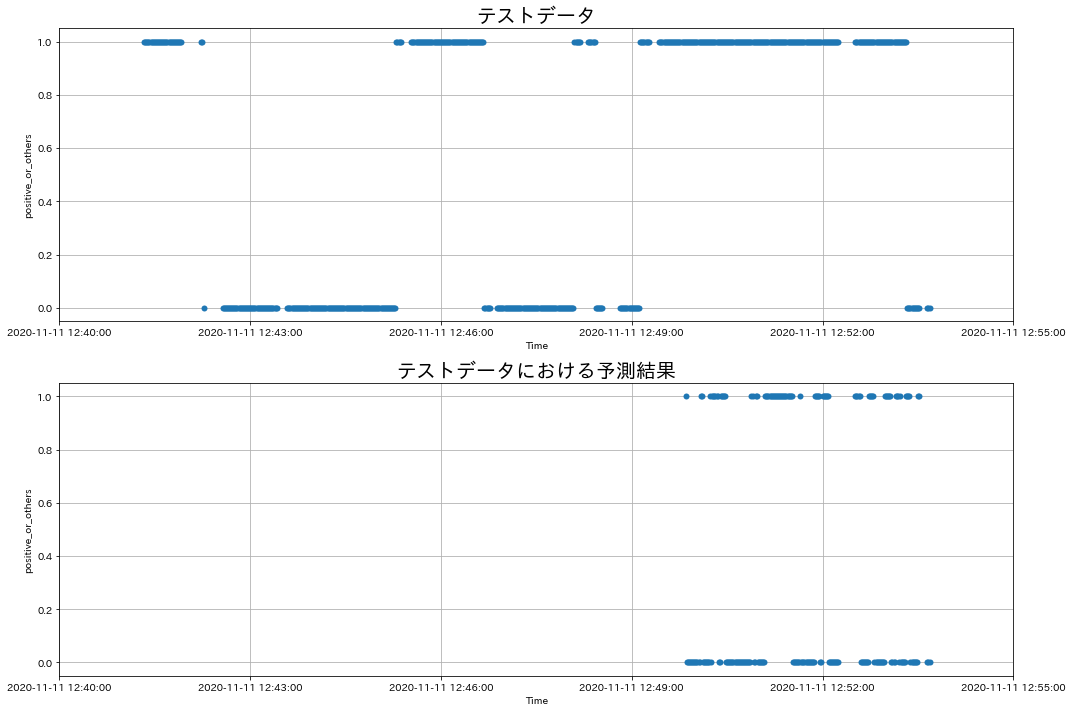

In [28]:
import datetime
import matplotlib.dates as mdates
import japanize_matplotlib

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(test.index, test["label"], marker="o", markeredgewidth=0,linewidth=0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax1.set_xlim(datetime.datetime(2020,11,11,12,40,0), datetime.datetime(2020,11,11,12,55,0))
ax1.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax1.set_title("テストデータ", fontsize=20)
ax1.set_xlabel("Time")
ax1.set_ylabel("positive_or_others")
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(predicted.index, predicted["label"], marker="o", markeredgewidth=0,linewidth=0)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax2.set_xlim(datetime.datetime(2020,11,11,12,40,0), datetime.datetime(2020,11,11,12,55,0))
ax2.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax2.set_title("テストデータにおける予測結果", fontsize=20)
ax2.set_xlabel("Time")
ax2.set_ylabel("positive_or_others")
ax2.grid(True)

plt.tight_layout()